In [2]:
#Importing important libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.axes import Axes

In [3]:
#Import csv file

netflix = pd.read_csv(r"C:\Users\abhee\OneDrive\Desktop\titles.csv")
netflix.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [3]:
netflix.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


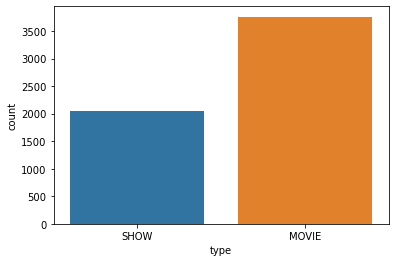

In [4]:
# let's see what are the types of entertainment we are going to see

sns.countplot(data = netflix, x = 'type')
plt.show()

In [5]:
# now let's the release years of the movies

In [7]:
netflix['release_year'].value_counts()

2019    848
2020    805
2018    774
2021    758
2017    580
       ... 
1974      1
1959      1
1962      1
1978      1
1945      1
Name: release_year, Length: 67, dtype: int64

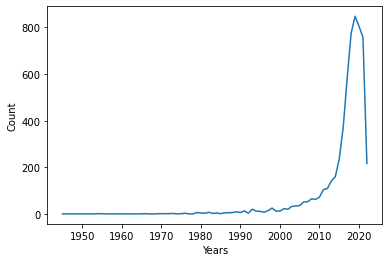

In [8]:
movie_release_count = netflix['release_year'].value_counts()
sns.lineplot(data = movie_release_count)
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()

So the movies are mostly from recent years on Netflix

# Analysing

Lets see which genre of the movie tends to be highest rated 

In [10]:
netflix['genres'].value_counts()

['comedy']                                            510
['drama']                                             350
['documentation']                                     320
['comedy', 'drama']                                   141
['drama', 'comedy']                                   128
                                                     ... 
['drama', 'family', 'comedy', 'music']                  1
['drama', 'thriller', 'western']                        1
['comedy', 'thriller', 'drama', 'action', 'crime']      1
['romance', 'drama', 'history', 'european']             1
['family', 'comedy', 'animation']                       1
Name: genres, Length: 1626, dtype: int64

Lets compare the IMDb ratings of these top 3 genres


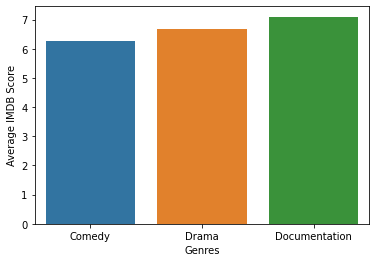

In [4]:
comedy = netflix[netflix['genres'] == "['comedy']"]
drama = netflix[netflix['genres'] == "['drama']"]
documentation = netflix[netflix['genres'] == "['documentation']"]
mean_values = [comedy['imdb_score'].mean(), drama['imdb_score'].mean(), documentation['imdb_score'].mean()]
genres = [0, 1, 2]
imdb: Axes = sns.barplot(x=genres, y=mean_values)
imdb.set_xlabel('Genres')
imdb.set_xticklabels(['Comedy', 'Drama', 'Documentation'])
imdb.set_ylabel('Average IMDB Score')
plt.show()

As we can see there is an inbalance dataset so to make it balance we take the same amount of data.

In [5]:
new_comedy = comedy.sample(n = 290, random_state = 5)
new_drama = drama.sample(n = 290, random_state = 5)
new_documentation = documentation.sample(n = 290, random_state = 5)

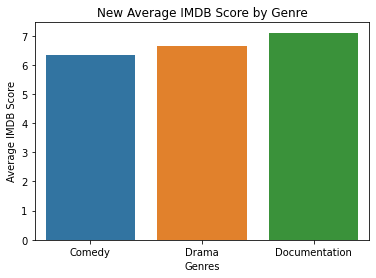

In [6]:
mean_values = [new_comedy['imdb_score'].mean(), new_drama['imdb_score'].mean(), new_documentation['imdb_score'].mean()]
new_imdb_score_plot: Axes = sns.barplot(x=genres, y=mean_values)
new_imdb_score_plot.set_xlabel('Genres')
new_imdb_score_plot.set_xticklabels(['Comedy', 'Drama', 'Documentation'])
new_imdb_score_plot.set_ylabel('Average IMDB Score')
new_imdb_score_plot.set_title('New Average IMDB Score by Genre')
plt.show()

Documentation has average high IMDb rating among the three


In [19]:
#Getting the Top 10 highest rated movie

title_movies = netflix[netflix['type'] == 'MOVIE']

In [20]:
movie_scoreimdb = title_movies.sort_values('imdb_score',ascending=False)
top10movie_imdb =movie_scoreimdb[['title', 'imdb_score','release_year']][0:10]
top10movie_imdb

,title,imdb_score,release_year
3352,David Attenborough: A Life on Our Planet,9.0,2020
2814,C/o Kancharapalem,9.0,2018
25,No Longer Kids,9.0,1979
876,Chhota Bheem & Krishna in Mayanagari,9.0,2011
260,Inception,8.8,2010
4473,Sky Tour: The Movie,8.8,2020
108,Forrest Gump,8.8,1994
519,A Lion in the House,8.7,2006
596,Anbe Sivam,8.7,2003
85,Bye Bye London,8.7,1982


In [25]:
#getting the Top 10 highest rated shows of all time

title_shows = netflix[netflix['type'] == 'SHOW']

In [26]:
shows_imdb_score = title_shows.sort_values('imdb_score', ascending = False)
top10shows = shows_imdb_score[['title', 'imdb_score', 'release_year']][0:10]
top10shows

,title,imdb_score,release_year
2927,#ABtalks,9.6,2018
656,Khawatir,9.6,2005
243,Breaking Bad,9.5,2008
259,Avatar: The Last Airbender,9.3,2005
3827,Kota Factory,9.3,2019
3320,Our Planet,9.3,2019
2057,My Mister,9.2,2018
1422,Reply 1988,9.2,2015
5059,Who Rules The World,9.2,2022
4847,Arcane,9.1,2021


Now let us see Top 10 directors and Actors 

In [12]:
# Importing the new dataset for credits

credits = pd.read_csv(r"C:\Users\abhee\OneDrive\Desktop\credits.csv")
credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [14]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77213 entries, 0 to 77212
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77213 non-null  int64 
 1   id         77213 non-null  object
 2   name       77213 non-null  object
 3   character  67586 non-null  object
 4   role       77213 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [15]:
credits.isnull().sum()

person_id       0
id              0
name            0
character    9627
role            0
dtype: int64

In [16]:
credits.drop(['character', 'person_id'], axis = 1, inplace = True)

In [17]:
credits.head()

,id,name,role
0,tm84618,Robert De Niro,ACTOR
1,tm84618,Jodie Foster,ACTOR
2,tm84618,Albert Brooks,ACTOR
3,tm84618,Harvey Keitel,ACTOR
4,tm84618,Cybill Shepherd,ACTOR


Now merging the data to for a new dataset with Actors and Directors 

In [20]:
netflix = netflix.merge( credits, how = 'outer', on = 'id')

In [21]:
netflix.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name,role
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,Robert De Niro,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,Jodie Foster,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,Albert Brooks,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,Harvey Keitel,ACTOR


In [22]:
# Getting only Directors

directors = netflix[netflix['role'] == 'DIRECTOR']
directors.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name,role
37,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,Martin Scorsese,DIRECTOR
84,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8,Terry Jones,DIRECTOR
85,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8,Terry Gilliam,DIRECTOR
107,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8,Terry Jones,DIRECTOR
149,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7,William Friedkin,DIRECTOR


In [25]:
#getting TOP 10 Directors

top_10_directors = directors.sort_values(['tmdb_score','tmdb_popularity'], ascending = False)[['name', 'tmdb_score', 'tmdb_popularity']].head(10)
top_10_directors

,name,tmdb_score,tmdb_popularity
27356,tooniverse,10.0,13.649
69480,Alex Cabral,10.0,7.430
27540,Shin Tae sik,10.0,6.616
64697,Peerapol Kirdjareun,10.0,6.550
64270,Fabio Ock,10.0,4.847
40624,Ding Pei,10.0,4.179
72972,Phil Allora,10.0,3.669
72973,Jae Woo Kim,10.0,3.669
64963,Donnie Lai Cheun-Yu,10.0,3.412
75964,Rick Suvalle,10.0,2.398


Now we saw who are the TOP 10 DIRECTORS on Netflix based on their TMDb Ratings

Now we are going to see Top 10 ACTORS

In [26]:
actors = netflix[netflix['role'] == 'ACTOR']
actors.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name,role
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,Robert De Niro,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,Jodie Foster,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,Albert Brooks,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,Harvey Keitel,ACTOR
5,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,Cybill Shepherd,ACTOR


In [27]:
top_10_actors = actors.sort_values(['tmdb_score', 'tmdb_popularity'], ascending = False)[['name', 'tmdb_score', 'tmdb_popularity']].head(10)
top_10_actors

,name,tmdb_score,tmdb_popularity
61221,Emmanuel Esparza,10.0,7.958
61222,Essined Aponte,10.0,7.958
61223,Manuel Navarro,10.0,7.958
61224,Álvaro Benet,10.0,7.958
61225,Alejandro Rodriguez,10.0,7.958
61226,Luis Mesa,10.0,7.958
61227,Wolframio Sinué,10.0,7.958
61228,Gilma Escobar,10.0,7.958
61229,Maia Landaburu,10.0,7.958
61230,Alejandro Muñoz,10.0,7.958
